In [ ]:
!unzip /content/drive/MyDrive/illegal_parking_pro/IllegalparkingoncityRoad.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/images/frame_0612_jpg.rf.c9ca68205e8595703ae5574d4493791f.jpg  
 extracting: train/images/frame_0612_jpg.rf.e7cf9faa153f301b772724d067742bbc.jpg  
 extracting: train/images/frame_0612_jpg.rf.f00ba43d3910d0ebd8a13db1bd0dab67.jpg  
 extracting: train/images/frame_0612_jpg.rf.f15239a8ab34b928c91dbe602893fc01.jpg  
 extracting: train/images/frame_0624_jpg.rf.0b6d5bc1afe75d72c90688d9e525152d.jpg  
 extracting: train/images/frame_0624_jpg.rf.0d2485fde49331de6a6759c04d75108b.jpg  
 extracting: train/images/frame_0624_jpg.rf.284f42a12296ddbf1bd72978e35615fc.jpg  
 extracting: train/images/frame_0624_jpg.rf.353e3ddfaacbf9ff24f7d9aac5c04af4.jpg  
 extracting: train/images/frame_0624_jpg.rf.633198d901e6f236d06fc5c38a197b8a.jpg  
 extracting: train/images/frame_0624_jpg.rf.67924bf4196eddb49d3ef16181a286de.jpg  
 extracting: train/images/frame_0624_jpg.rf.6850b8404c560459bc02893422a6dd34.jpg  
 extracting: train/images/frame_0624

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Install the ultralytics library which includes YOLOv9
!pip install ultralytics


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.8/824.8 kB 19.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
pip install scikit-learn

In [ ]:
import os
train_img_dir = '/content/train/images'
train_images = os.listdir(train_img_dir)

val_img_dir = '/content/valid/images'
val_images = os.listdir(val_img_dir)

train_labels_dir = '/content/train/labels'
val_labels_dir = '/content/valid/labels'


In [ ]:
import yaml
dataset_config = {
    'train': '../train/images',
    'val': '../valid/images',
    'test': '../test/images',
    'nc': 2,
    'names': ['Illegal', 'Legal'],

}

labels_list = dataset_config['names']

print("labels list:")
print(labels_list)


labels list:
['Illegal', 'Legal']


In [ ]:
def label_name(label_class):
    if 0 <= label_class < len(labels_list):
        return labels_list[label_class]
    else:
        return "none"


In [ ]:
# Define the label_name function
def label_name(label_class):
    if 0 <= label_class < len(labels_list):
        return labels_list[label_class]
    else:
        return "none"

# Define the load_labels function
def load_labels(images, labels_dir):
    labels = []
    for img in images:
        label_file_path = os.path.join(labels_dir, img.replace('.jpg', '.txt'))
        with open(label_file_path, "r") as file:
            text = file.read().strip()
        if len(text) < 1:
            labels.append('None')
        else:
            labels.append(int(text.split()[0]))
    return labels


In [ ]:
# Load the labels
train_labels = load_labels(train_images, train_labels_dir)
val_labels = load_labels(val_images, val_labels_dir)

In [ ]:
# Define the load_labels function
def load_labels(images, labels_dir):
    labels = []
    for img in images:
        label_file_path = os.path.join(labels_dir, img.replace('.jpg', '.txt'))
        if os.path.exists(label_file_path):
            with open(label_file_path, "r") as file:
                text = file.read().strip()
            if len(text) >= 1:
                labels.append(int(text.split()[0]))
            else:
                labels.append(-1)
        else:
            labels.append(-1)
    return labels

# Define the label_name function
# Assuming 'labels_list' is defined somewhere as a list of label names
labels_list = ['illegal', 'legal']

def label_name(label_class):
    if 0 <= label_class < len(labels_list):
        return labels_list[label_class]
    elif label_class == -1:  # Handle missing labels
        return "None"
    else:
        return "none"

In [ ]:
import pandas as pd
import plotly.express as px

# Define the label_name function to map numeric classes to descriptive names
def label_name(label_class):
    if label_class == 1:
        return 'Legal'
    elif label_class == 0:
        return 'Illegal'
    else:
        return 'None'

df_train = pd.DataFrame({'label_class': [0, 1, 1, -1]})
df_val = pd.DataFrame({'label_class': [0, 1, -1, 0]})

# Convert 'label_class' to numeric, handling errors by coercing to NaN
df_train['label_class'] = pd.to_numeric(df_train['label_class'], errors='coerce')
df_val['label_class'] = pd.to_numeric(df_val['label_class'], errors='coerce')

# Convert 'label_class' to integers, filling NaN with -1
df_train['label_class'] = df_train['label_class'].fillna(-1).astype(int)
df_val['label_class'] = df_val['label_class'].fillna(-1).astype(int)

# Apply the label_name function to get descriptive names
df_train['label_name'] = df_train['label_class'].apply(label_name)
df_val['label_name'] = df_val['label_class'].apply(label_name)

# Define the color mapping
color_mapping = {
    'Illegal': '#002b36',  # Dark blue
    'Legal': '#073642',    # Deep blue
    'None': '#268bd2'      # Blue
}

# Plot histogram for training data
fig_train = px.histogram(df_train.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_map=color_mapping)
fig_train.update_layout(
    title='Training Dataset Label Distribution',
    xaxis_title='Classes',
    yaxis_title="Count",
    width=600,
    height=500,
    legend=dict(
        x=0.05,
        y=0.95,
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='Black',
        borderwidth=1
    )
)
fig_train.show()

# Plot histogram for validation data
fig_val = px.histogram(df_val.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_map=color_mapping)
fig_val.update_layout(
    title='Validation Dataset Label Distribution',
    xaxis_title='Classes',
    yaxis_title="Count",
    width=600,
    height=500,
    legend=dict(
        x=0.05,
        y=0.95,
        traceorder='normal',
        bgcolor='rgba(255, 255, 255, 0.5)',
        bordercolor='Black',
        borderwidth=1
    )
)
fig_val.show()


In [ ]:
import pandas as pd
import plotly.express as px

# Define the label_name function to map numeric classes to descriptive names
def label_name(label_class):
    if label_class == 1:
        return 'Legal'
    elif label_class == 0:
        return 'Illegal'
    else:
        return 'None'

df_train = pd.DataFrame({'label_class': [0, 1, 1, -1]})
df_val = pd.DataFrame({'label_class': [0, 1, -1, 0]})

# Convert 'label_class' to numeric, handling errors by coercing to NaN
df_train['label_class'] = pd.to_numeric(df_train['label_class'], errors='coerce')
df_val['label_class'] = pd.to_numeric(df_val['label_class'], errors='coerce')

# Convert 'label_class' to integers, filling NaN with -1
df_train['label_class'] = df_train['label_class'].fillna(-1).astype(int)
df_val['label_class'] = df_val['label_class'].fillna(-1).astype(int)

# Apply the label_name function to get descriptive names
df_train['label_name'] = df_train['label_class'].apply(label_name)
df_val['label_name'] = df_val['label_class'].apply(label_name)

# Plot histogram for training data
fig_train = px.histogram(df_train.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_sequence=px.colors.sequential.thermal)
fig_train.update_layout(title='Training Dataset Distribution of Labels', xaxis_title='Classes', yaxis_title="Count", width=600, height=500)
fig_train.show()

# Plot histogram for validation data
fig_val = px.histogram(df_val.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_sequence=px.colors.sequential.thermal)
fig_val.update_layout(title='Validation Dataset Distribution of Labels', xaxis_title='Classes', yaxis_title="Count", width=600, height=500)
fig_val.show()


In [ ]:
import os
import pandas as pd
import plotly.express as px

# Define the label_name function to map numeric classes to descriptive names
def label_name(label_class):
    if label_class == 1:
        return 'Legal'
    elif label_class == 0:
        return 'Illegal'
    else:
        return 'None'

# Function to load YOLO annotation files and extract class labels
def load_yolo_annotations(annotation_dir):
    labels = []
    for file_name in os.listdir(annotation_dir):
        if file_name.endswith('.txt'):
            with open(os.path.join(annotation_dir, file_name), 'r') as file:
                for line in file:
                    class_id = int(line.split()[0])
                    labels.append(class_id)
    return labels

# Load the training and validation labels from the annotation files
train_annotation_dir = '/content/train/labels'
val_annotation_dir = '/content/valid/labels'

# Ensure that annotation directories exist
assert os.path.exists(train_annotation_dir), f"Training annotation directory does not exist: {train_annotation_dir}"
assert os.path.exists(val_annotation_dir), f"Validation annotation directory does not exist: {val_annotation_dir}"

# Load annotations
train_labels = load_yolo_annotations(train_annotation_dir)
val_labels = load_yolo_annotations(val_annotation_dir)

# Debugging: Print out the number of labels loaded for training and validation sets
print(f"Number of training labels loaded: {len(train_labels)}")
print(f"Number of validation labels loaded: {len(val_labels)}")

# Create DataFrames
df_train = pd.DataFrame({'label_class': train_labels})
df_val = pd.DataFrame({'label_class': val_labels})

# Convert 'label_class' to integers
df_train['label_class'] = df_train['label_class'].astype(int)
df_val['label_class'] = df_val['label_class'].astype(int)

# Apply the label_name function to get descriptive names
df_train['label_name'] = df_train['label_class'].apply(label_name)
df_val['label_name'] = df_val['label_class'].apply(label_name)

# Plot histogram for training data
fig_train = px.histogram(df_train.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_sequence=px.colors.sequential.thermal)
fig_train.update_layout(title='Training Dataset Distribution of Labels', xaxis_title='Classes', yaxis_title="Count", width=600, height=500)
fig_train.show()

# Plot histogram for validation data
fig_val = px.histogram(df_val.sort_values(by='label_name'), x="label_name", color="label_name", color_discrete_sequence=px.colors.sequential.thermal)
fig_val.update_layout(title='Validation Dataset Distribution of Labels', xaxis_title='Classes', yaxis_title="Count", width=600, height=500)
fig_val.show()


Number of training labels loaded: 4809
Number of validation labels loaded: 317


In [ ]:
from ultralytics import YOLO
import os
data_yaml_path = '/content/data.yaml'

model = YOLO('yolov9s.pt')

# Train the model
!yolo train data=data.yaml model=yolov9s.pt epochs=50
pass


100%|██████████| 14.7M/14.7M [00:00<00:00, 213MB/s]


Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov9s.pt, data=data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_

In [ ]:
# Validate the model
model.val(data='/content/data.yaml')


Ultralytics YOLOv8.2.57 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv9s summary (fused): 486 layers, 7,198,048 parameters, 0 gradients, 26.9 GFLOPs


val: Scanning /content/valid/labels.cache... 224 images, 65 backgrounds, 0 corrupt: 100%|██████████| 224/224 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 14/14 [00:09<00:00,  1.51it/s]


                   all        224        317      0.044    0.00634    0.00192   0.000772
                person        102        147     0.0212     0.0068    0.00114   0.000512
               bicycle         85        170     0.0669    0.00588    0.00271    0.00103
Speed: 4.7ms preprocess, 15.5ms inference, 0.0ms loss, 8.8ms postprocess per image
Results saved to runs/detect/val


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784cb4e031f0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [ ]:
from ultralytics import YOLO

# Path to data.yaml
#data_yaml_path = '/content/data.yaml'

# Load the model with the trained weights
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')  # Path to your trained weights

# Test the model on the test dataset
results = model.predict(data='/content/data.yaml')

# Print the results
print(results)


WARNING ⚠️ 'source' is missing. Using 'source=/usr/local/lib/python3.10/dist-packages/ultralytics/assets'.

image 1/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/bus.jpg: 640x480 (no detections), 189.1ms
image 2/2 /usr/local/lib/python3.10/dist-packages/ultralytics/assets/zidane.jpg: 384x640 (no detections), 146.0ms
Speed: 9.2ms preprocess, 167.6ms inference, 58.8ms postprocess per image at shape (1, 3, 384, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'Illegal', 1: 'Legal'}
obb: None
orig_img: array([[[119, 146, 172],
        [121, 148, 174],
        [122, 152, 177],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[120, 147, 173],
        [122, 149, 175],
        [123, 153, 178],
        ...,
        [161, 171, 188],
        [160, 170, 187],
        [160, 170, 187]],

       [[123, 150, 176],
        [124, 151, 177]

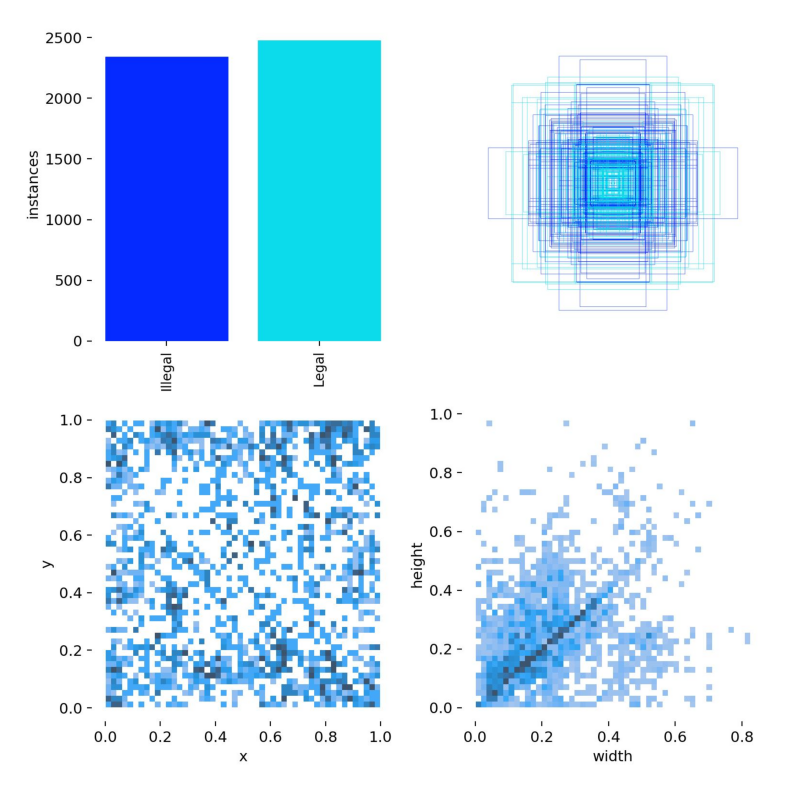

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = '/content/runs/detect/train/labels.jpg'
img = mpimg.imread(image_path)

plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()



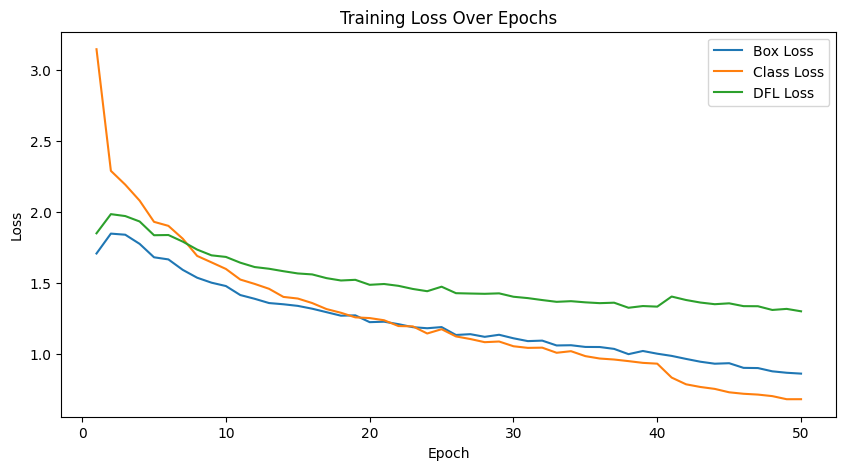

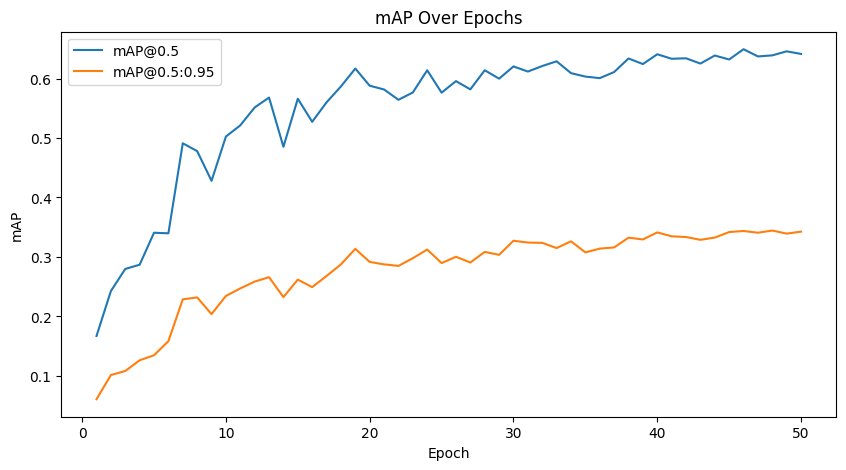

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Path to the results file
results_file = '/content/runs/detect/train/results.csv'

# Load the results
data = pd.read_csv(results_file)

# Column names based on your data
epochs_col = '                  epoch'
box_loss_col = '         train/box_loss'
cls_loss_col = '         train/cls_loss'
dfl_loss_col = '         train/dfl_loss'
mAP50_col = '       metrics/mAP50(B)'
mAP50_95_col = '    metrics/mAP50-95(B)'

# Extract the data for plotting
epochs = data[epochs_col]
box_loss = data[box_loss_col]
cls_loss = data[cls_loss_col]
dfl_loss = data[dfl_loss_col]
mAP50 = data[mAP50_col]
mAP50_95 = data[mAP50_95_col]

# Plot training loss
plt.figure(figsize=(10, 5))
plt.plot(epochs, box_loss, label="Box Loss")
plt.plot(epochs, cls_loss, label="Class Loss")
plt.plot(epochs, dfl_loss, label="DFL Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Over Epochs")
plt.legend()
plt.show()

# Plot mAP over epochs
plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP50, label="mAP@0.5")
plt.plot(epochs, mAP50_95, label="mAP@0.5:0.95")
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.title("mAP Over Epochs")
plt.legend()
plt.show()


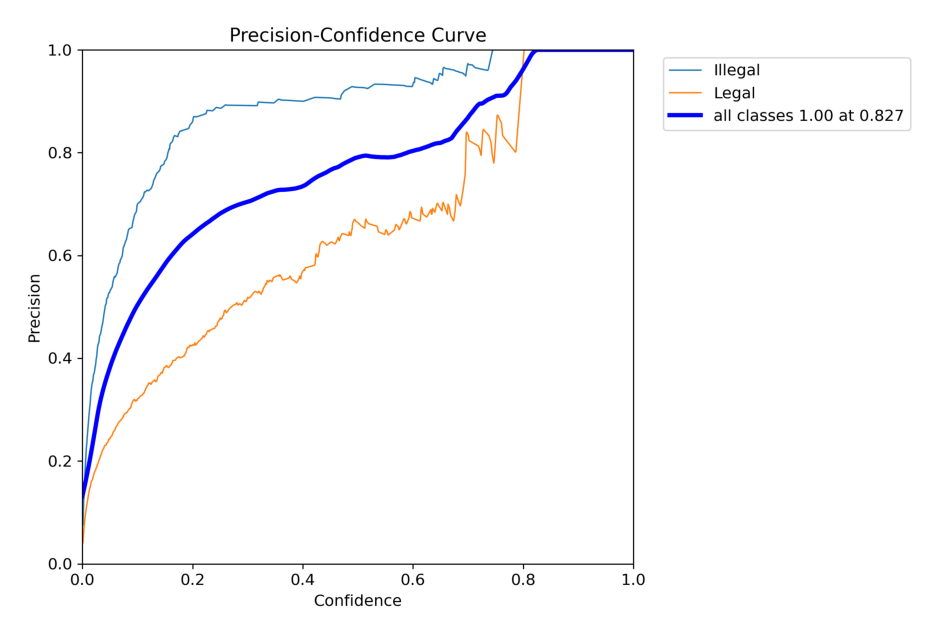

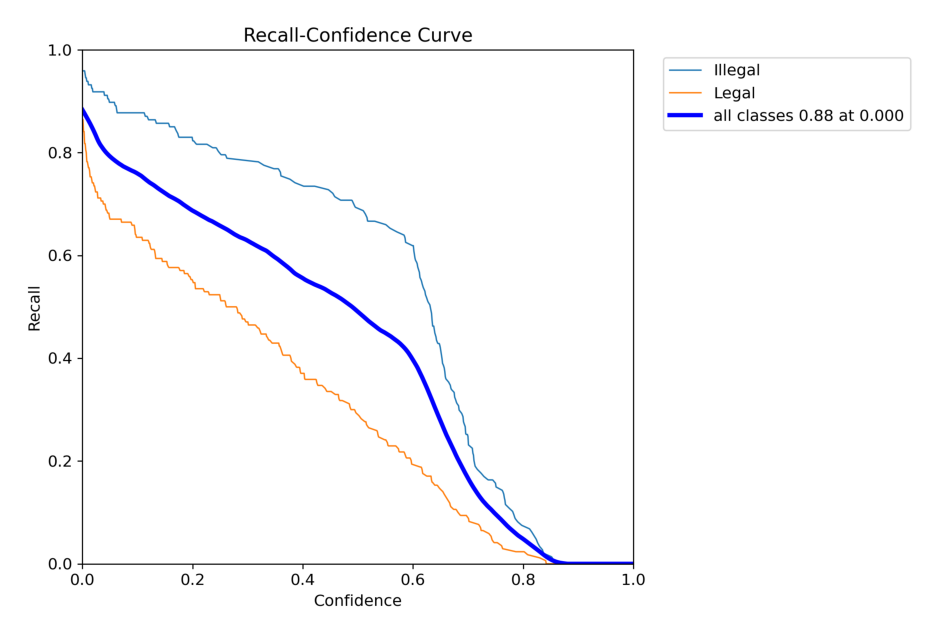

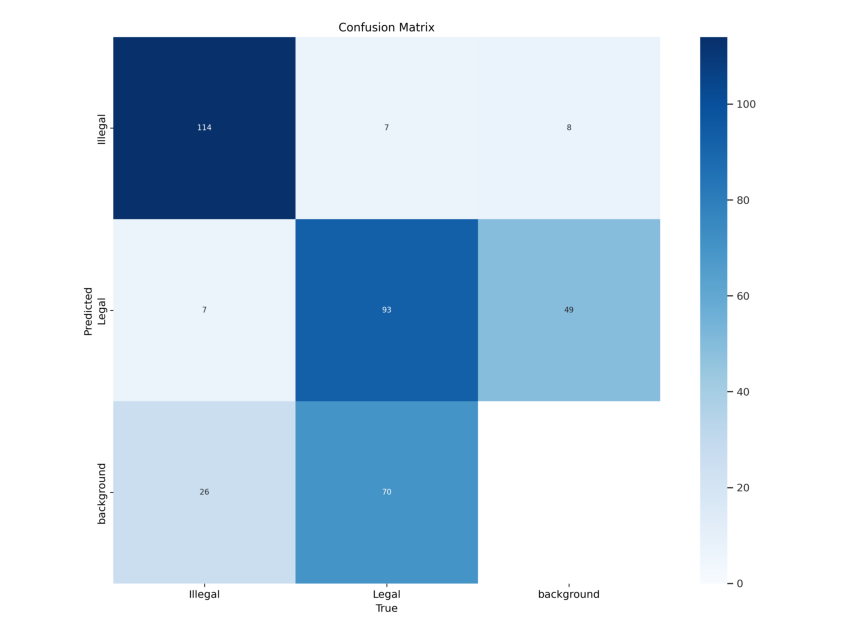

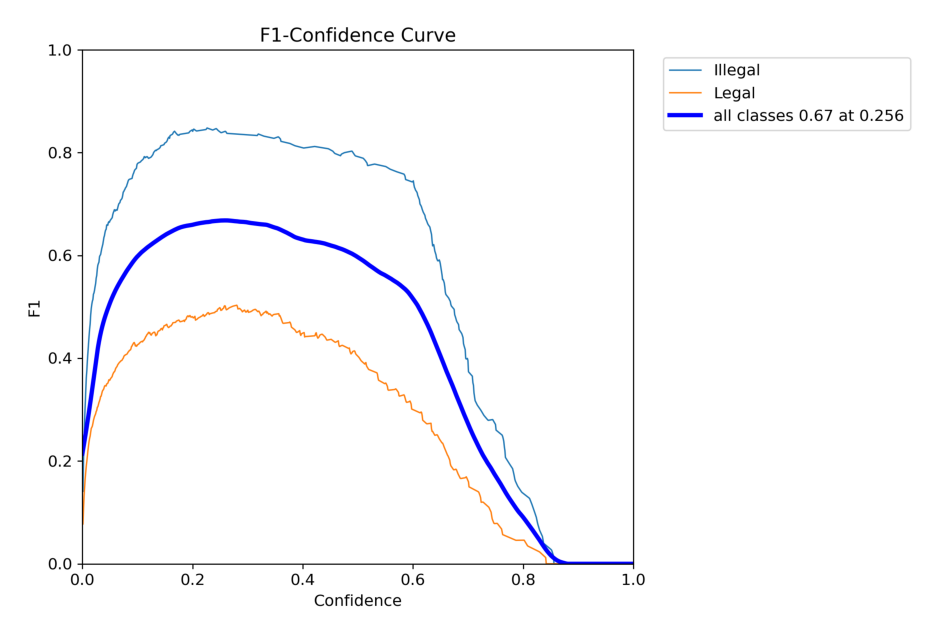

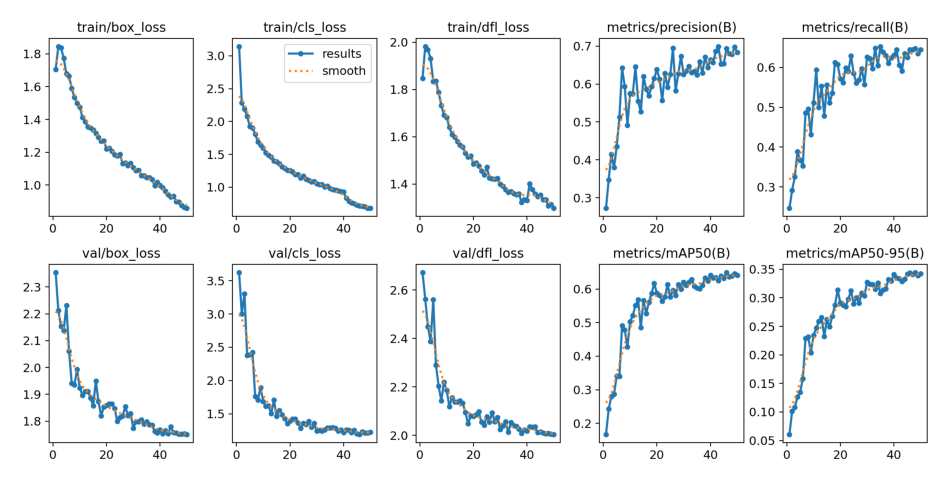

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

list_of_metrics = ["P_curve.png", "R_curve.png", "confusion_matrix.png", "F1_curve.png", "results.png"]

for metric in list_of_metrics:
    image = Image.open(f'/content/runs/detect/train/{metric}')
    plt.figure(figsize=(12, 8))
    plt.axis("off")
    plt.imshow(image)
    plt.show()


image 1/148 /content/test/images/frame_0000-7-_jpg.rf.33924de1bc08ede0827e8cd6d34d8ac0.jpg: 640x640 (no detections), 34.5ms
image 2/148 /content/test/images/frame_0000-7-_jpg.rf.93d482f0434df1351c1e3b4cf24a36b2.jpg: 640x640 3 Illegals, 29.7ms
image 3/148 /content/test/images/frame_0000-7-_jpg.rf.9d86ce9e1aac60767153cdd9c48f0726.jpg: 640x640 (no detections), 40.9ms
image 4/148 /content/test/images/frame_0000-7-_jpg.rf.eda357eeb26debda52bc75ba1cb9dc10.jpg: 640x640 1 Illegal, 37.0ms
image 5/148 /content/test/images/frame_0026_jpg.rf.3199eebeaf8b5d60e9904397ef583dc5.jpg: 640x640 2 Legals, 38.1ms
image 6/148 /content/test/images/frame_0026_jpg.rf.34d173564496f343328146e9c2069b60.jpg: 640x640 (no detections), 36.1ms
image 7/148 /content/test/images/frame_0026_jpg.rf.b656db6bad154b7d3fad9af9eb0e6336.jpg: 640x640 (no detections), 41.4ms
image 8/148 /content/test/images/frame_0026_jpg.rf.e096f08ada4b2165f129d63ebf76ac60.jpg: 640x640 1 Illegal, 2 Legals, 31.3ms
image 9/148 /content/test/images/

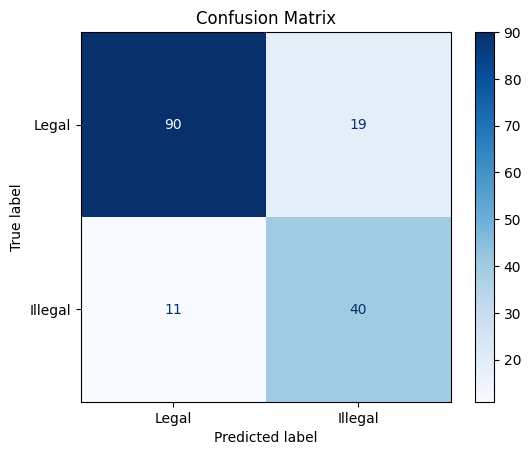

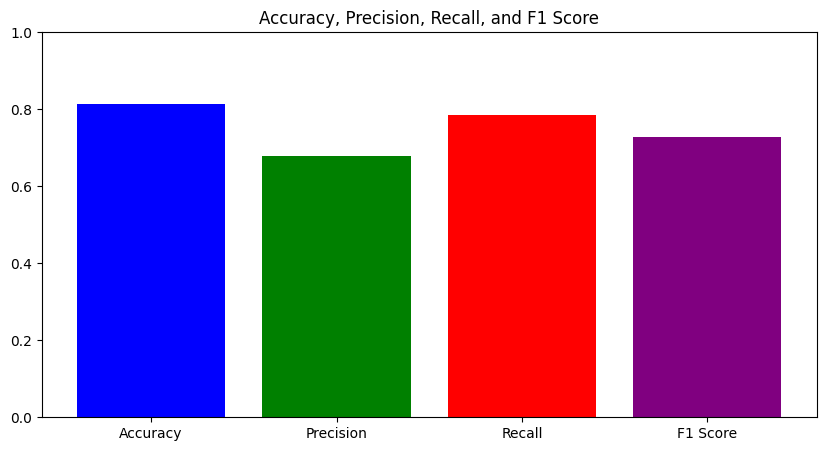

In [ ]:
import os
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Function to read ground truth labels from YOLO format annotation files
def read_ground_truth_labels(labels_path, image_file):
    label_file = os.path.join(labels_path, os.path.splitext(image_file)[0] + '.txt')
    if not os.path.exists(label_file):
        return []

    with open(label_file, 'r') as f:
        labels = [int(line.split()[0]) for line in f.readlines()]

    return labels

# Load your model
model = YOLO('/content/runs/detect/train/weights/best.pt')  # Replace with your model path

# Path to test images and labels
images_path = '/content/test/images'  # Replace with your test images path
labels_path = '/content/test/labels'  # Replace with your test labels path

# Perform inference
results = model.predict(images_path)

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over the results
for result in results:
    image_file = os.path.basename(result.path)  # Get the image file name

    # Retrieve ground truth labels for the image
    ground_truth_labels = read_ground_truth_labels(labels_path, image_file)

    # Get predicted labels for the current image
    predicted_labels_current_image = [int(box.cls) for box in result.boxes]

    # Ensure both lists have the same length for comparison
    num_labels = min(len(ground_truth_labels), len(predicted_labels_current_image))
    y_true.extend(ground_truth_labels[:num_labels])
    y_pred.extend(predicted_labels_current_image[:num_labels])

# Compute accuracy, precision, recall, f1-score
accuracy = accuracy_score(y_true, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='binary')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print("Confusion Matrix:\n", conf_matrix)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=["Legal", "Illegal"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Plot accuracy, precision, recall, f1-score
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple'])
plt.title("Accuracy, Precision, Recall, and F1 Score")
plt.ylim([0, 1])
plt.show()


In [ ]:
trained_weights = "/content/runs/detect/train/weights/best.pt"
model = YOLO(trained_weights)


In [ ]:
def test_visualization(images):
    output = model.predict(images)
    fig, axes = plt.subplots(3, 3, figsize=(11, 11))
    for i, r in enumerate(images):
        ax = axes[i // 3, i % 3]
        im_bgr = cv2.imread(r)
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
        ax.axis('off')
        ax.set_title(f"Image {i}")
        ax.imshow(im_rgb)
    fig, axes = plt.subplots(3, 3, figsize=(10, 10))
    for i, r in enumerate(output):
        ax = axes[i // 3, i % 3]
        im_bgr = r.plot()  # BGR-order numpy array
        im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image
        ax.axis('off')
        ax.set_title(f"Image {i}")
        ax.imshow(im_rgb)



0: 640x640 1 Illegal, 1 Legal, 18.2ms
1: 640x640 2 Illegals, 1 Legal, 18.2ms
2: 640x640 2 Legals, 18.2ms
3: 640x640 1 Legal, 18.2ms
4: 640x640 1 Illegal, 18.2ms
5: 640x640 2 Legals, 18.2ms
6: 640x640 2 Illegals, 1 Legal, 18.2ms
7: 640x640 4 Illegals, 2 Legals, 18.2ms
8: 640x640 1 Illegal, 18.2ms
Speed: 1.7ms preprocess, 18.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


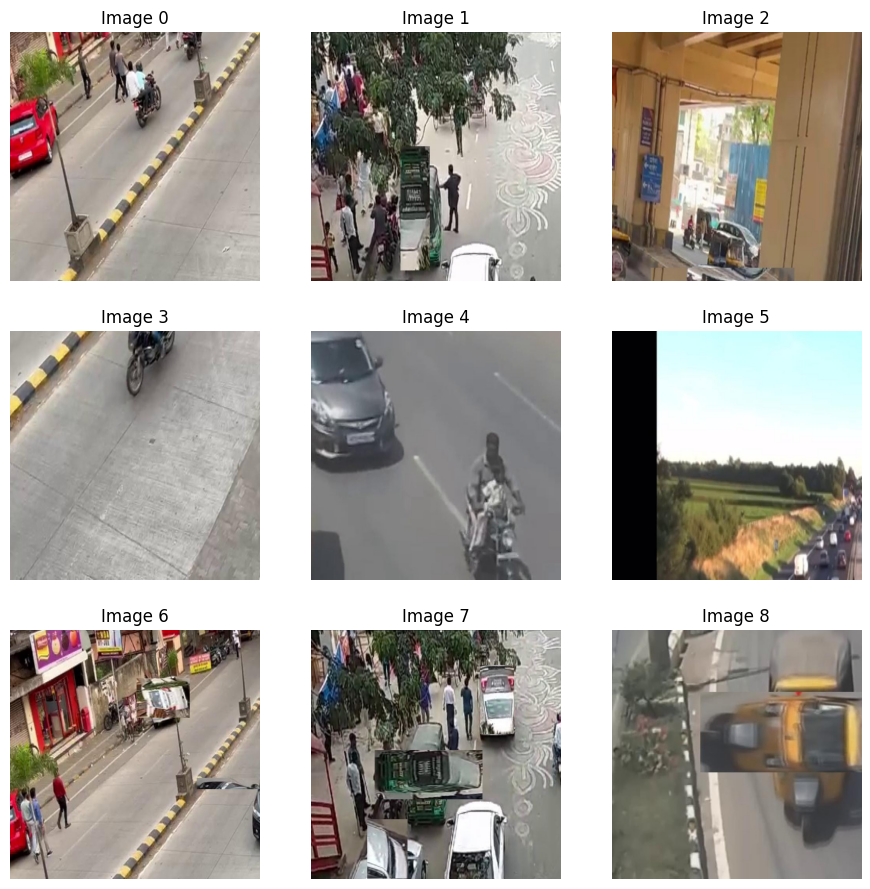

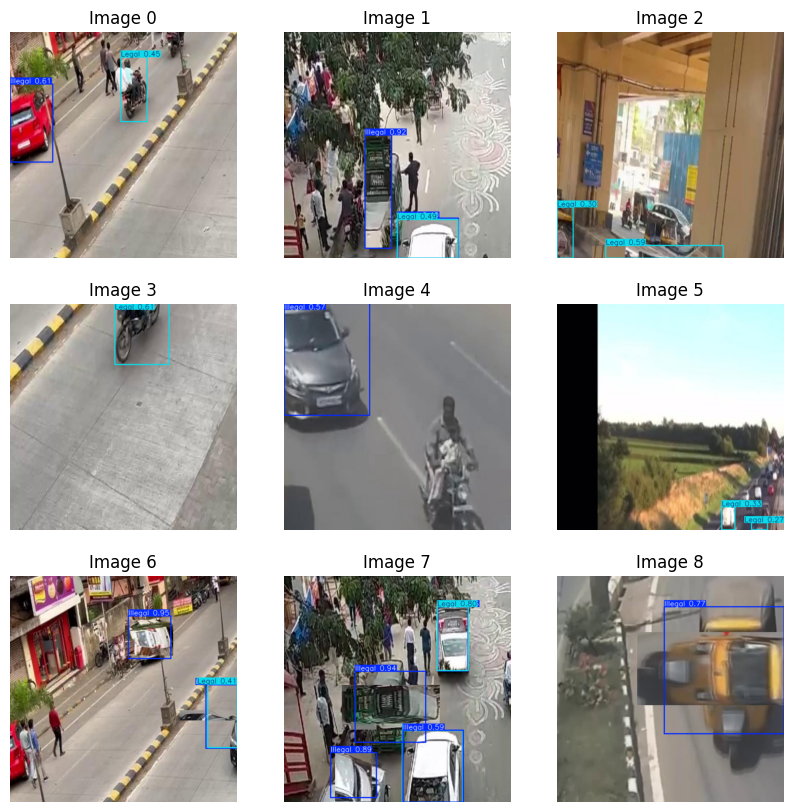

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import cv2 # Import the cv2 module

# Verify the path exists
if os.path.exists('/content/train/images'):
    test_img_dir = '/content/train/images'
    test_images = os.listdir(test_img_dir)
    test_img = [os.path.join(test_img_dir, img) for img in test_images[:9]]

    test_visualization(test_img)



image 1/1 /content/drive/MyDrive/image111.jpg: 640x640 2 Illegals, 2 Legals, 1157.4ms
Speed: 3.1ms preprocess, 1157.4ms inference, 16.3ms postprocess per image at shape (1, 3, 640, 640)
The parking is Illegal.


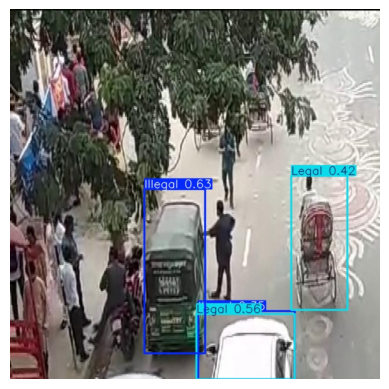

In [ ]:
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')

# Define the path to the new image you want to test
new_image_path = '/content/drive/MyDrive/image111.jpg'

# Perform inference and get results
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions.jpg')  # Use 'filename' to specify the save path

# Load and display the saved image
output_image_path = '/content/predictions.jpg'  # This will be the saved image path
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()


image 1/1 /content/valid/images/frame_0504-4-_jpg.rf.9ac5c6a8a4d15d2858aa5d29d75db8a0.jpg: 640x640 1 Illegal, 1153.3ms
Speed: 5.6ms preprocess, 1153.3ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
The parking is Illegal.


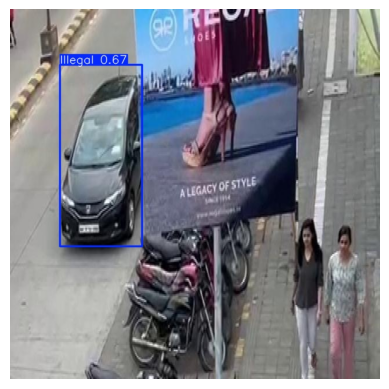

In [ ]:
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')  # Update the path if necessary

# Define the path to the new image you want to test

new_image_path = '/content/valid/images/frame_0504-4-_jpg.rf.9ac5c6a8a4d15d2858aa5d29d75db8a0.jpg'
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions2.jpg')

# Load and display the saved image
output_image_path = '/content/predictions2.jpg'
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/photo_illegal.webp: 352x640 3 Illegals, 1 Legal, 728.6ms
Speed: 6.2ms preprocess, 728.6ms inference, 1.4ms postprocess per image at shape (1, 3, 352, 640)
The parking is Illegal.


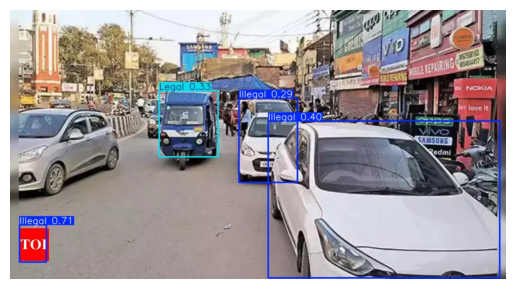

In [ ]:
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')

# Define the path to the new image you want to test
new_image_path = '/content/drive/MyDrive/photo_illegal.webp'

# Perform inference and get results
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions6.jpg')  # Use 'filename' to specify the save path

# Load and display the saved image
output_image_path = '/content/predictions6.jpg'  # This will be the saved image path
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/ilegal_car2.jpg: 384x640 1 Illegal, 1347.9ms
Speed: 4.6ms preprocess, 1347.9ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
The parking is Illegal.


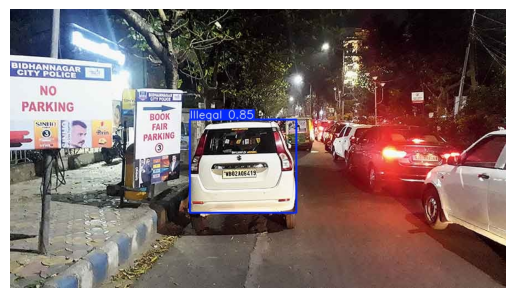

In [ ]:
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')

# Define the path to the new image you want to test
new_image_path = '/content/drive/MyDrive/ilegal_car2.jpg'

# Perform inference and get results
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions5.jpg')  # Use 'filename' to specify the save path

# Load and display the saved image
output_image_path = '/content/predictions5.jpg'  # This will be the saved image path
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/ilegAL_CAR3.jpg: 448x640 2 Illegals, 3 Legals, 1461.9ms
Speed: 4.9ms preprocess, 1461.9ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
The parking is Illegal.


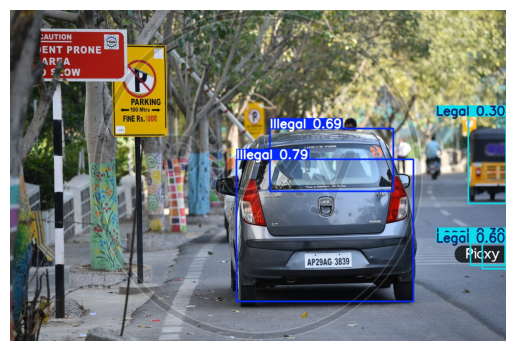

In [ ]:
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')

# Define the path to the new image you want to test
new_image_path = '/content/drive/MyDrive/ilegAL_CAR3.jpg'

# Perform inference and get results
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions7.jpg')  # Use 'filename' to specify the save path

# Load and display the saved image
output_image_path = '/content/predictions7.jpg'  # This will be the saved image path
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()


image 1/1 /content/drive/MyDrive/CAR_ILLEGAL.webp: 384x640 1 Illegal, 870.1ms
Speed: 8.3ms preprocess, 870.1ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
The parking is Illegal.


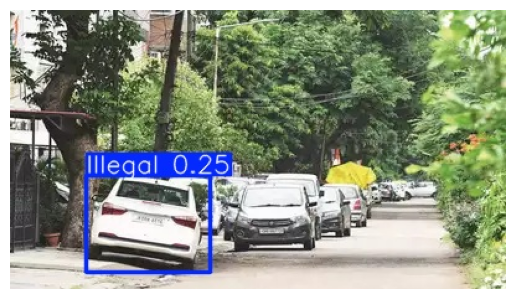

In [ ]:

import matplotlib.pyplot as plt

# Load the trained model
model = YOLO('/content/drive/MyDrive/best_yolov9.pt')

# Define the path to the new image you want to test
new_image_path = '/content/drive/MyDrive/CAR_ILLEGAL.webp'

# Perform inference and get results
results = model.predict(source=new_image_path)

# Assuming 'results' is a list, iterate over each result
for result in results:
    detected_classes = [model.names[int(box[-1])] for box in result.boxes.data]

    # Print the results
    if 'Illegal' in detected_classes:
        print("The parking is Illegal.")
    else:
        print("The parking is Legal.")

    # Visualize the results
    result.show()

    # Save the output image, specify the full filename including directory
    result.save(filename='/content/predictions9.jpg')  # Use 'filename' to specify the save path

# Load and display the saved image
output_image_path = '/content/predictions9.jpg'  # This will be the saved image path
output_image = plt.imread(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()